## Use machine learning linear regression to predict the closing region (divide the price into 4) of APPLE stocks in a day considering the spread (highest-lowest price) attained that day

In [133]:
#imports needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from datetime import time,date

In [134]:
#taking advantage of yahoo finance to get apple stocks data
try:
    import yfinance
except:
    !pip install -q yfinance

try:
    import yahoofinancials
except:
    !pip install -q yahoofinancials

In [135]:
import yfinance as yf
import yahoofinancials as yfs
pd.set_option('display.max.rows',None)

#downloading hourly prices
df = yf.download('EURUSD=X',start="2022-01-01",end=date.today(),interval="1h",progress=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-03 00:00:00,1.137656,1.138045,1.136493,1.136622,1.136622,0
2022-01-03 01:00:00,1.136622,1.137268,1.135332,1.136105,1.136105,0
2022-01-03 02:00:00,1.136235,1.136493,1.134559,1.134559,1.134559,0
2022-01-03 03:00:00,1.134687,1.135718,1.134559,1.135203,1.135203,0
2022-01-03 04:00:00,1.135460,1.135589,1.134301,1.134430,1.134430,0


In [181]:
#getting the spread attained
spread = []

for i in range(len(df.Open)):
    spread.append(int((df.High[i]-df.Low[i]) * 10000))

df['Spread'] = spread

df.head()

,Open,High,Low,Close,Adj Close,Region,Region Index,Spread
Datetime,,,,,,,,
2022-01-03 00:00:00,1.137656,1.138045,1.136493,1.136622,1.136622,8,1,15
2022-01-03 01:00:00,1.136622,1.137268,1.135332,1.136105,1.136105,39,2,19
2022-01-03 02:00:00,1.136235,1.136493,1.134559,1.134559,1.134559,0,1,19
2022-01-03 03:00:00,1.134687,1.135718,1.134559,1.135203,1.135203,55,3,11
2022-01-03 04:00:00,1.135460,1.135589,1.134301,1.134430,1.134430,9,1,12


In [183]:
#now get the region onto which the close happened/
region  = []

for i in range(len(df.Open)):
    spreads = abs(df.High[i] - df.Low[i])
    if(spreads>0):
        reg = ((df.Close[i]-df.Low[i])*100)/spreads
        region.append(int(reg))
    else:
        region.append(0)

region[:5]

[8, 39, 0, 55, 9]

In [184]:
#add the region to the dataframe
df['Region'] = region

#getting the region index - 4
def index(inpRegion):
    if(inpRegion>=0 and inpRegion<=25):
        return 1;
    if(inpRegion>25 and inpRegion<=50):
        return 2;
    if(inpRegion>50 and inpRegion<=75):
        return 3;
    return 4

df['Region Index'] = df['Region'].apply(index)

df.head()

,Open,High,Low,Close,Adj Close,Region,Region Index,Spread
Datetime,,,,,,,,
2022-01-03 00:00:00,1.137656,1.138045,1.136493,1.136622,1.136622,8,1,15
2022-01-03 01:00:00,1.136622,1.137268,1.135332,1.136105,1.136105,39,2,19
2022-01-03 02:00:00,1.136235,1.136493,1.134559,1.134559,1.134559,0,1,19
2022-01-03 03:00:00,1.134687,1.135718,1.134559,1.135203,1.135203,55,3,11
2022-01-03 04:00:00,1.135460,1.135589,1.134301,1.134430,1.134430,9,1,12


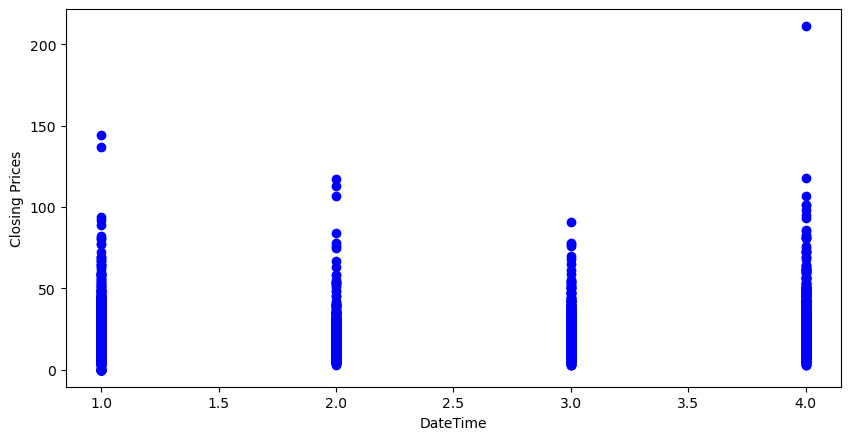

In [188]:
#plotting the closing price against the date
plt.figure(figsize=(10,5), dpi=100)
plt.xlabel('DateTime')
plt.ylabel('Closing Prices')
plt.scatter(df['Region Index'],df['Spread'], color='blue')
plt.show()

In [202]:
#model data - train 70% and test 30%
from sklearn.model_selection import train_test_split
X = np.array(df['Spread']).reshape(-1,1)
y = np.array( df['Region Index']).reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [205]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [210]:
#x_intercept:
model.intercept_

array([2.16946942])

In [212]:
#gradient.. line of best fit
model.coef_

array([[0.00817499]])

In [215]:
#accuracy score in %
model.score(X_train,y_train) * 100

0.7440919843942018

### an accuracy score depicts how much reliable the model is on a scale of 1-100% the higher the better. The example below show a very weak or negligible relationship between the spread of an asset - EURUSD and the region of closing